In [1]:
import pandas as pd

import seaborn as sns

In [2]:
import numpy as np

In [3]:
train = pd.read_csv('data/train.csv',index_col = "Id")

print(train.shape)

train.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test = pd.read_csv('data/test.csv', index_col = "Id")

print(test.shape)

test.head()

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 탐험적 분석

#### 1. 건물 등급

1. 수치가 높으면 건물가가 높고(or 낮고) 수치가 낮으면 건물가가 낮다(높다.)
2. 5단위로 끊어져 있고 20 ~ 200 정도로 구분되어 있기에 범위를 잘 구분해주면 집값을 예측하는데 도움이 될듯하다.

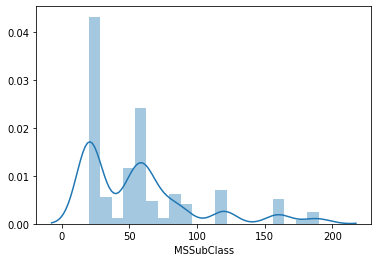

In [5]:
sns.distplot(train["MSSubClass"])

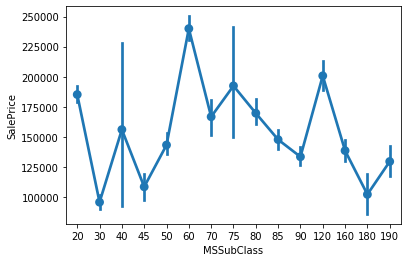

In [6]:
sns.pointplot(data = train, x = "MSSubClass", y = "SalePrice")

분석결과

1. 수치가 곧 가격의 비례를 보여주는 것은 아닌 것 같지만, 등급에 따라 가격수치가 달라지고 있다.
2. 각 수치에 대한 설명을 바탕으로 분석해보면, Newer house 들이 비싸다. older 들이 싸다
3. 160의 경우 newer이지만 가격이 비싼편이 아닌데 그 이유를 확인해볼 필요가 있다. (120, 160의 경우 계획단위개발에 따른 집인데 이것이 집값의 요인이 될 수 있다.)
4. 층별, age, newer, older, PUD 여부에 따라 판매가가 달라질 수 있다.

In [7]:
train_condition1 = (train["MSSubClass"] == 20) | (train["MSSubClass"] == 30) | (train["MSSubClass"] == 40) | (train["MSSubClass"] == 120)


train["class_1_story"] = train_condition1

train["class_1_story"].head()

Id
1    False
2     True
3    False
4    False
5    False
Name: class_1_story, dtype: bool

In [8]:
test_condition1 = (test["MSSubClass"] == 20) | (test["MSSubClass"] == 30) | (test["MSSubClass"] == 40) | (test["MSSubClass"] == 120)


test["class_1_story"] = test_condition1

test["class_1_story"].head()

Id
1461     True
1462     True
1463    False
1464    False
1465     True
Name: class_1_story, dtype: bool

In [9]:
condition2 = (train["MSSubClass"] == 20) | (train["MSSubClass"] == 60) | (train["MSSubClass"] == 160)

train["class_newer"] = condition2

train["class_newer"].head()

Id
1     True
2     True
3     True
4    False
5     True
Name: class_newer, dtype: bool

In [10]:
test_condition2 = (test["MSSubClass"] == 20) | (test["MSSubClass"] == 60) | (test["MSSubClass"] == 160)

test["class_newer"] = test_condition2

test["class_newer"].head()

Id
1461     True
1462     True
1463     True
1464     True
1465    False
Name: class_newer, dtype: bool

In [11]:
train_condition3 = (train["MSSubClass"] == 30) | (train["MSSubClass"] == 70)

train["class_older"] = train_condition3

train["class_older"].head()

Id
1    False
2    False
3    False
4     True
5    False
Name: class_older, dtype: bool

In [12]:
test_condition3 = (test["MSSubClass"] == 30) | (test["MSSubClass"] == 70)

test["class_older"] = test_condition3

test["class_older"].head()

Id
1461    False
1462    False
1463    False
1464    False
1465    False
Name: class_older, dtype: bool

In [13]:
train_condition4 = (train["MSSubClass"] == 120) | (train["MSSubClass"] == 150) | (train["MSSubClass"] == 160) | (train["MSSubClass"] == 180)

train["class_PUD"] = train_condition4

train["class_PUD"].head()

Id
1    False
2    False
3    False
4    False
5    False
Name: class_PUD, dtype: bool

In [14]:
test_condition4 = (test["MSSubClass"] == 120) | (test["MSSubClass"] == 150) | (test["MSSubClass"] == 160) | (test["MSSubClass"] == 180)

test["class_PUD"] = test_condition4

test["class_PUD"].head()

Id
1461    False
1462    False
1463    False
1464    False
1465     True
Name: class_PUD, dtype: bool

In [15]:
train_condition5 = (train["MSSubClass"] == 60) | (train["MSSubClass"] == 70) | (train["MSSubClass"] == 160)


train["class_2_story"] = train_condition5

train["class_2_story"].head()

Id
1     True
2    False
3     True
4     True
5     True
Name: class_2_story, dtype: bool

In [16]:
test_condition5 = (test["MSSubClass"] == 60) | (test["MSSubClass"] == 70) | (test["MSSubClass"] == 160)


test["class_2_story"] = test_condition5

test["class_2_story"].head()

Id
1461    False
1462    False
1463     True
1464     True
1465    False
Name: class_2_story, dtype: bool

In [17]:
train_condition6 = (train["MSSubClass"] == 40) | (train["MSSubClass"] == 45) | (train["MSSubClass"] == 50) | (train["MSSubClass"] == 75) | (train["MSSubClass"] == 90) \
                 | (train["MSSubClass"] == 150) | (train["MSSubClass"] == 190)

train["class_ages"] = train_condition6

train["class_ages"].head()

Id
1    False
2    False
3    False
4    False
5    False
Name: class_ages, dtype: bool

In [18]:
test_condition6 = (test["MSSubClass"] == 40) | (test["MSSubClass"] == 45) | (test["MSSubClass"] == 50) | (test["MSSubClass"] == 75) | (test["MSSubClass"] == 90) \
                 | (test["MSSubClass"] == 150) | (test["MSSubClass"] == 190)

test["class_ages"] = test_condition6

test["class_ages"].head()

Id
1461    False
1462    False
1463    False
1464    False
1465    False
Name: class_ages, dtype: bool

In [19]:
import matplotlib.pyplot as plt

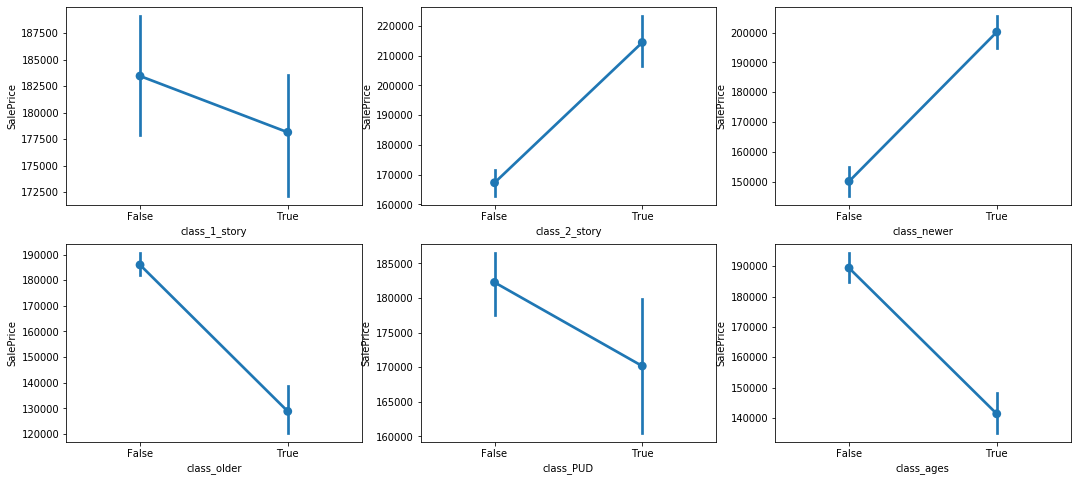

In [20]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.pointplot(data = train, x = "class_1_story", y = "SalePrice", ax = ax1)
sns.pointplot(data = train, x = "class_2_story", y = "SalePrice", ax = ax2)
sns.pointplot(data = train, x = "class_newer", y = "SalePrice", ax = ax3)
sns.pointplot(data = train, x = "class_older", y = "SalePrice", ax = ax4)
sns.pointplot(data = train, x = "class_PUD", y = "SalePrice", ax = ax5)
sns.pointplot(data = train, x = "class_ages", y = "SalePrice", ax = ax6)

In [21]:
train_condition7 = (train["MSSubClass"] == 20) | (train["MSSubClass"] == 90)

train["class_styles"] = train_condition7

train["class_styles"].head()

Id
1    False
2     True
3    False
4    False
5    False
Name: class_styles, dtype: bool

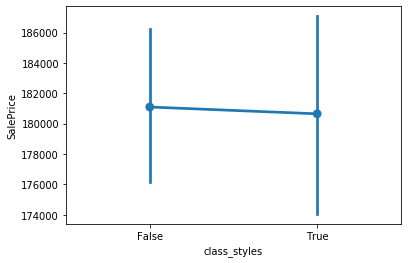

In [22]:
sns.pointplot(data = train, x = "class_styles", y = "SalePrice")

1. 1층 여부는 모수가 적지만 1층인 경우 값이 싸지는 경향이 있다. 하지만 2층 여부에 따른 가격차이는 의미있게 나타난다. 즉, 2층집은 비싸다
2. 새집은 비싸고 헌집은 싸다.
3. PUD(계획개발)의 여부가 가격차이에 영향을 준다고 볼 수 있다.
4. age여부에 따라 가격차이가 크다

#### 2. 지역분류

1. 지역은 농지, 상업, 물위마을주거, 산업지, 주거(과밀, 저밀, 저밀(공원), 중밀)
2. 상업, 주거중, 과밀 지역의 건물값이 비쌀 것이다.(유동인구가 많은 지역은 땅값이 비싸기 때문에)
3. 물위마을지역 건물은 상대적으로 쌀 것이다.(접근성이 떨어짐)
4. 농지, 산업지는 특수목적이므로 상대적으로 유동인구도 적고 땅값도 쌀 것이다?

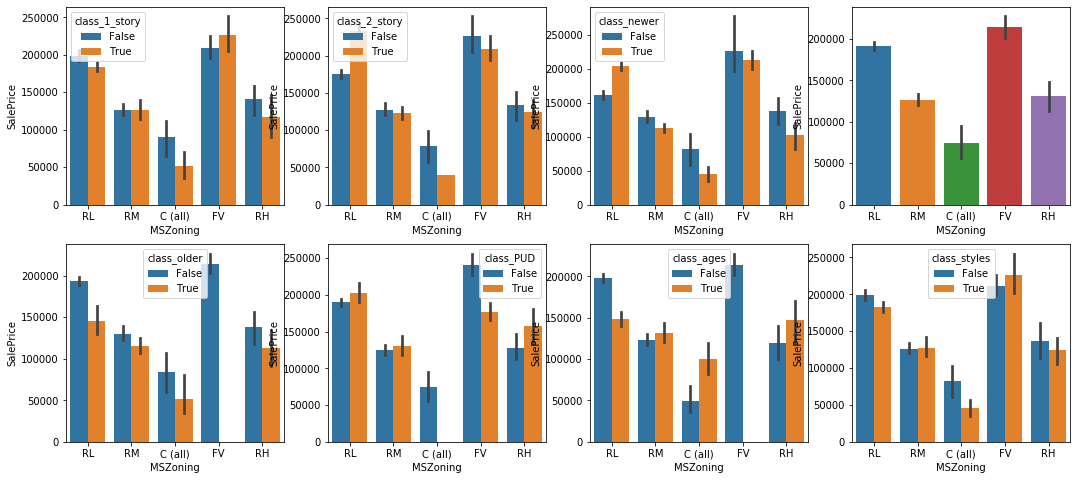

In [23]:
figure, ((ax1, ax2, ax3, ax7), (ax4, ax5, ax6, ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(18, 8)


sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_1_story", ax = ax1)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_2_story", ax = ax2)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_newer", ax = ax3)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_older", ax = ax4)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_PUD", ax = ax5)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_ages", ax = ax6)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", ax = ax7)
sns.barplot(data = train, x = "MSZoning", y = "SalePrice", hue = "class_styles", ax = ax8)

##### 분석결과

1. 분석은 정반대로 유동인구가 적고, floating village 의 건물가격이 더 비싸다
2. RM과 RH의 차이는 거의 없으며, C가 유독 가격이 싸다는 것은 눈여겨볼 만하다.
3. 따라서 건물class와 같이 분석해 볼 필요가 있다.

In [44]:
data3 = train[(train["class_newer"]== True) & (train["MSZoning"]).str.contains("RL")]
data3

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,class_1_story,class_newer,class_older,class_PUD,class_2_story,class_ages,class_styles
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,208500,False,True,False,False,True,False,False
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,WD,Normal,181500,True,True,False,False,False,False,True
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,WD,Normal,223500,False,True,False,False,True,False,False
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,WD,Normal,250000,False,True,False,False,True,False,False
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,307000,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Abnorml,84500,True,True,False,False,False,False,True
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,175000,False,True,False,False,True,False,False
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,210000,True,True,False,False,False,False,True


In [51]:
train["MSZoning"].str.contains("RL").value_counts()

True     1151
False     309
Name: MSZoning, dtype: int64

4. 상업지역에서는 1층건물이 아닌경우가 더 비싸다(하지만 상업건물전체 모수가 적다.)
5. 전체적으로는 class_ages 에 따라 가격이 떨어지는데 상업건물은 반대현상이 나타난다.
6. 다른 지역보다 데이터가 많은 RL에서의 결과를 중점적으로 보면 좋을듯하다.

#### 3.연결된 길거리와의 거리

1. 연속형데이터 이므로 정규분포형태가 나타날 것이고, 특이한구간이 있다면 그구간은 길게 늘어지는 형태가 될 것이다.
2. 길거리에 가까울수록 땅값이 높은 경향이 나타날 것이다.(역세권, 상권 등등)

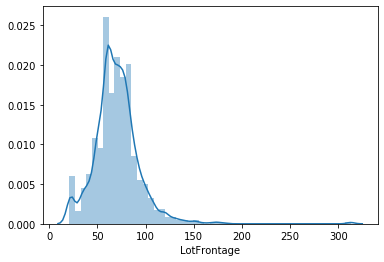

In [52]:
sns.distplot(train["LotFrontage"])

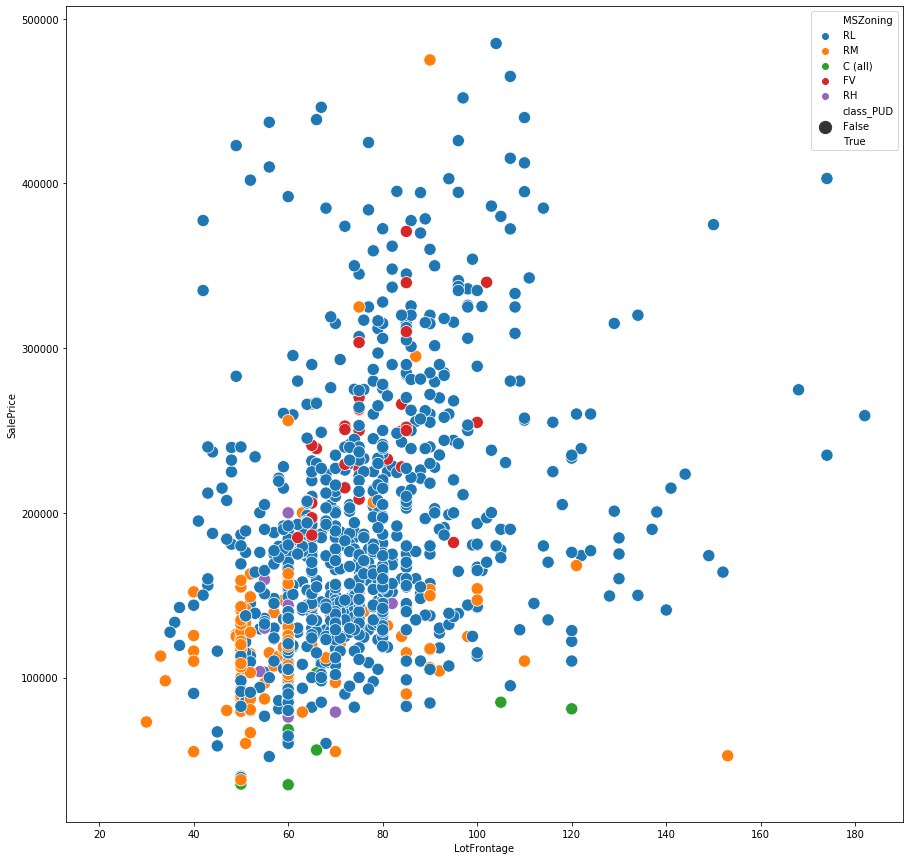

In [75]:
low_price = train[(train["SalePrice"] <= 500000) & (train["LotFrontage"] < 200)]
plt.figure(figsize = (15,15))
sns.scatterplot(data=low_price,x="LotFrontage",y="SalePrice",size="class_PUD",sizes=(0,150), hue = "MSZoning")

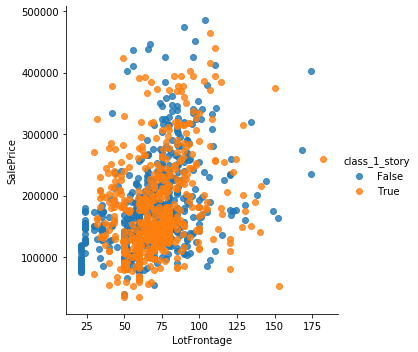

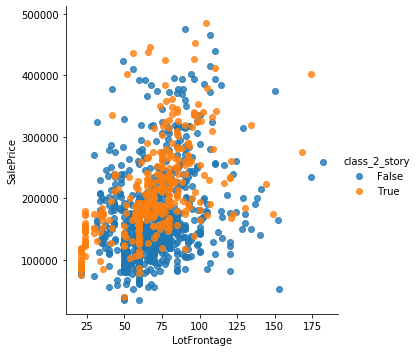

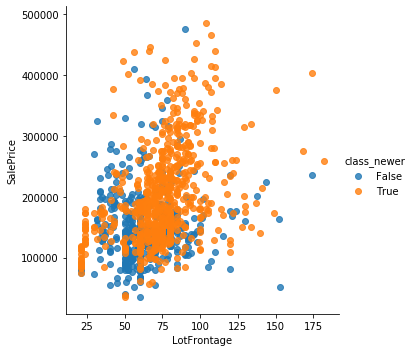

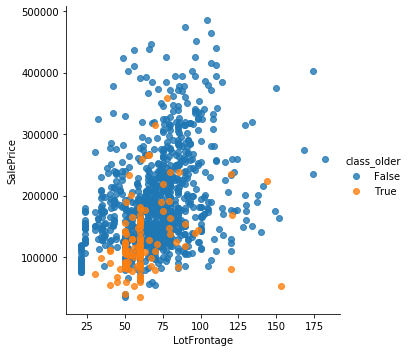

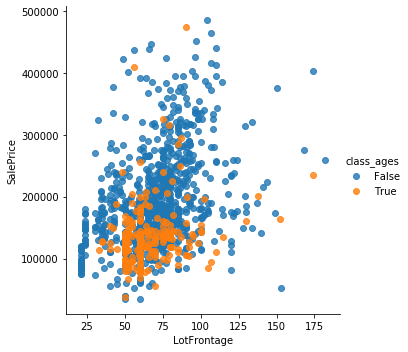

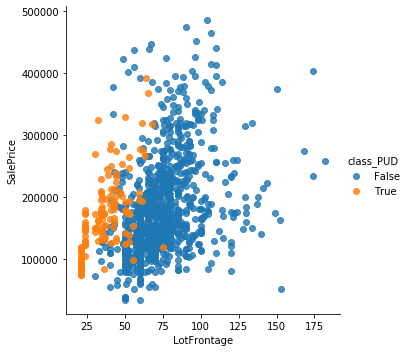

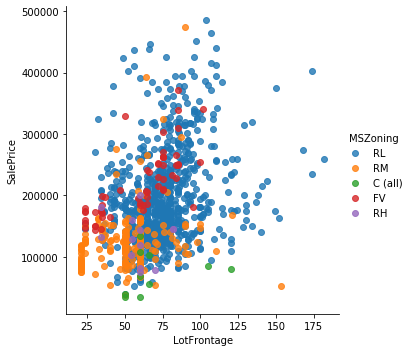

In [79]:
low_price = train[(train["SalePrice"] <= 500000) & (train["LotFrontage"] < 200)]


sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_1_story", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_2_story", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_newer", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_older", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_ages", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="class_PUD", fit_reg=False),
sns.lmplot(data=low_price, x="LotFrontage", y="SalePrice", hue="MSZoning", fit_reg=False)


### 분석결과

In [ ]:
1. 상관관계는 거의 없어보인다.